In [1]:
import sys
print(sys.prefix)
print(sys.executable)

/opt/anaconda3/envs/hand
/opt/anaconda3/envs/hand/bin/python


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

#model building
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

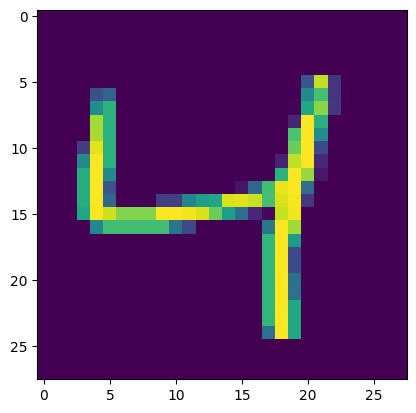

In [14]:
plt.imshow(X_train[2]);

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [27]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 1s 675us/step - loss: 0.2809 - accuracy: 0.9184 - val_loss: 0.1601 - val_accuracy: 0.9532
Epoch 2/25
1500/1500 [==============================] - 1s 630us/step - loss: 0.1213 - accuracy: 0.9637 - val_loss: 0.1275 - val_accuracy: 0.9620
Epoch 3/25
1500/1500 [==============================] - 1s 622us/step - loss: 0.0855 - accuracy: 0.9739 - val_loss: 0.0996 - val_accuracy: 0.9696
Epoch 4/25
1500/1500 [==============================] - 1s 621us/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9707
Epoch 5/25
1500/1500 [==============================] - 1s 620us/step - loss: 0.0510 - accuracy: 0.9838 - val_loss: 0.0882 - val_accuracy: 0.9753
Epoch 6/25
1500/1500 [==============================] - 1s 609us/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0980 - val_accuracy: 0.9730
Epoch 7/25
1500/1500 [==============================] - 1s 618us/step - loss: 0.0327 - accuracy: 0.9892 - val_loss: 0.1094 -

In [29]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 317us/step


In [30]:
y_prob

array([[2.3877122e-13, 2.6491908e-12, 1.1918543e-15, ..., 1.0000000e+00,
        4.2418120e-18, 1.4815489e-10],
       [8.9617652e-21, 3.8337120e-12, 1.0000000e+00, ..., 8.4056383e-22,
        6.6182696e-14, 9.3195308e-31],
       [2.2459956e-11, 1.0000000e+00, 3.1062043e-12, ..., 9.7109458e-09,
        1.3632316e-08, 2.2878826e-12],
       ...,
       [9.3054634e-31, 4.8311358e-21, 1.5458907e-30, ..., 1.3099800e-15,
        1.7999253e-16, 3.4042680e-13],
       [1.7986120e-26, 4.4454510e-32, 2.4292991e-32, ..., 7.4358438e-25,
        2.7070672e-13, 3.3225480e-25],
       [5.2186176e-16, 3.6545117e-24, 8.5147000e-19, ..., 1.5442133e-27,
        7.4998491e-19, 8.8520070e-24]], dtype=float32)

In [31]:
y_pred = y_prob.argmax(axis=1)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.9795

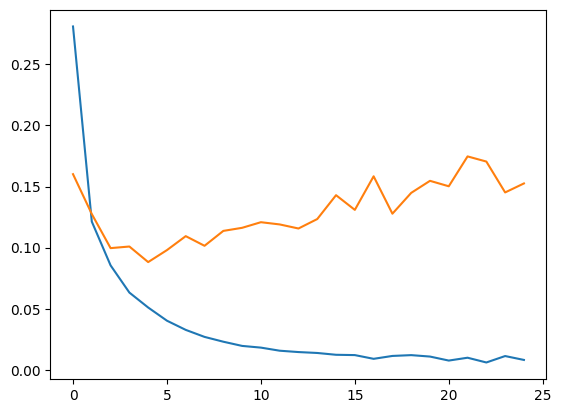

In [34]:
#plot the visuals for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

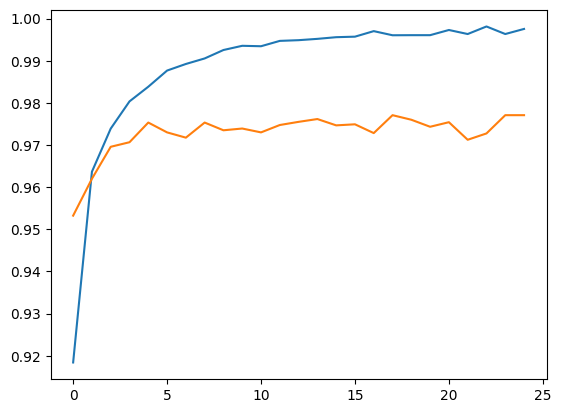

In [35]:
#plot the visuals for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### - It's slighlty overfitting.